In [28]:
import os
from os.path import join

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data_path = "./drive/MyDrive/wafer/wm811k/"
print(os.listdir(data_path))

['LSWMD.pkl', 'y_3000.npy', 'x_3000.npy', 'y_3500.npy', 'x_3500.npy', 'x_3500_128.npy', 'y_3500_128.npy']


In [31]:
df = pd.read_pickle(data_path + "LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [32]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [33]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


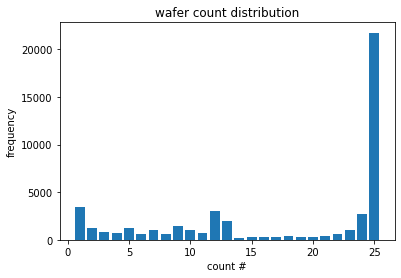

In [34]:
wafer_cnt_dist = df.groupby("lotName").count()['waferMap'].value_counts().sort_index()

plt.bar(wafer_cnt_dist.index, wafer_cnt_dist.values)
plt.title("wafer count distribution")
plt.xlabel("count #")
plt.ylabel("frequency")
plt.show()

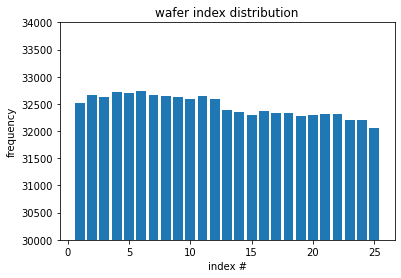

In [35]:
wafer_index_dist = np.unique(df.waferIndex, return_counts=True)

plt.bar(wafer_index_dist[0], wafer_index_dist[1])
plt.title('wafer index distribution')
plt.xlabel("index #")
plt.ylabel("frequency")
plt.ylim(30000, 34000)
plt.show()

In [36]:
def fine_dim(map):
  return np.size(map, axis = 0), np.size(map, axis = 1)

df['waferMapDim'] = df.waferMap.apply(fine_dim)
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim
416401,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2367.0,lot24805,4.0,[],[],"(51, 59)"
766968,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1376.0,lot45731,23.0,[[Test]],[[none]],"(44, 41)"
134321,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",811.0,lot8803,6.0,[],[],"(34, 31)"
765507,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1791.0,lot45673,10.0,[[Training]],[[none]],"(48, 48)"
152942,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot9921,21.0,[],[],"(64, 71)"
666979,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",712.0,lot41525,23.0,[],[],"(32, 29)"
232836,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7810.0,lot14574,8.0,[],[],"(89, 112)"
466310,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",712.0,lot28679,19.0,[],[],"(32, 29)"
804220,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",895.0,lot47247,20.0,[[Test]],[[none]],"(33, 35)"
736928,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",741.0,lot44517,2.0,[[Test]],[[none]],"(33, 29)"


In [37]:
wafer_dim_dist = np.unique(df.waferMapDim, return_counts=True)
len(wafer_dim_dist[0])

632

In [38]:
df.groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(51, 59)      7890
(34, 31)      8155
(44, 44)      8601
(38, 38)      8895
(35, 40)     10676
(31, 28)     10788
(64, 71)     11692
(27, 25)     12655
(29, 26)     13247
(39, 31)     13562
(31, 31)     14569
(52, 59)     14812
(39, 37)     15327
(33, 29)     20276
(33, 33)     23886
(30, 34)     29513
(26, 26)     30078
(49, 39)     39323
(25, 27)     64083
(32, 29)    108687
Name: waferMap, dtype: int64

In [39]:
def fTypeConvertor(fType):
  if len(fType) == 0:
    return None
  if fType[0][0] == 'none':
    return None
  return fType[0][0]

In [40]:
df['fType'] = df['failureType'].apply(fTypeConvertor)

In [41]:
df.groupby('fType')['failureType'].count()

fType
Center       4294
Donut         555
Edge-Loc     5189
Edge-Ring    9680
Loc          3593
Near-full     149
Random        866
Scratch      1193
Name: failureType, dtype: int64

In [42]:
df[df['fType'] == 'Scratch'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(33, 37)      14
(51, 30)      15
(72, 72)      17
(41, 38)      18
(38, 38)      22
(25, 27)      23
(35, 31)      26
(49, 39)      28
(26, 30)      29
(116, 146)    32
(50, 43)      32
(42, 44)      39
(41, 33)      44
(33, 29)      47
(44, 41)      48
(52, 59)      54
(39, 37)      60
(30, 34)      69
(26, 26)      72
(29, 26)      80
Name: waferMap, dtype: int64

In [43]:
df[df['fType'] == 'Loc'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(42, 44)     42
(45, 43)     47
(26, 30)     48
(52, 59)     57
(25, 26)     63
(41, 33)     70
(41, 42)     80
(32, 29)     90
(34, 34)     91
(44, 41)    101
(35, 40)    101
(27, 25)    104
(33, 29)    107
(29, 26)    117
(25, 27)    172
(39, 31)    182
(39, 37)    222
(30, 34)    241
(35, 31)    246
(26, 26)    297
Name: waferMap, dtype: int64

In [44]:
df[df['fType'] == 'Edge-Loc'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(25, 26)     58
(45, 42)     67
(42, 44)     82
(35, 40)     82
(51, 59)     87
(27, 25)     96
(41, 33)    130
(33, 29)    130
(33, 33)    132
(26, 30)    153
(39, 31)    154
(56, 41)    189
(32, 29)    190
(35, 31)    207
(29, 26)    233
(26, 26)    296
(30, 34)    306
(25, 27)    355
(44, 41)    390
(39, 37)    473
Name: waferMap, dtype: int64

In [45]:
df[df['fType'] == 'Center'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(25, 26)        28
(101, 103)      29
(64, 71)        33
(52, 59)        33
(32, 29)        39
(41, 33)        41
(41, 42)        45
(29, 26)        50
(35, 31)        53
(30, 34)        58
(35, 40)        60
(39, 31)        61
(39, 50)        63
(39, 46)        66
(26, 26)        90
(31, 31)       172
(40, 40)       173
(39, 37)       173
(34, 34)       246
(25, 27)      2251
Name: waferMap, dtype: int64

In [46]:
df[df['fType'] == 'Donut'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(30, 30)      3
(37, 31)      4
(30, 34)      4
(54, 42)      5
(51, 44)      5
(49, 39)      5
(27, 25)      6
(32, 29)      6
(56, 41)      7
(37, 55)      8
(45, 43)      8
(57, 58)      9
(59, 67)     11
(44, 41)     12
(54, 71)     17
(39, 37)     22
(45, 50)     23
(35, 40)     33
(35, 31)     98
(41, 42)    234
Name: waferMap, dtype: int64

In [47]:
df[df['fType'] == 'Edge-Ring'].groupby('waferMapDim').count()['waferMap'].sort_values().tail(20)

waferMapDim
(29, 26)        64
(57, 55)        66
(56, 62)        68
(53, 66)        75
(25, 26)        78
(38, 38)        86
(100, 72)       94
(73, 78)       100
(26, 30)       119
(60, 59)       124
(55, 48)       135
(48, 52)       249
(41, 41)       351
(43, 42)       374
(46, 46)       443
(107, 150)     463
(69, 73)       483
(63, 62)      1420
(53, 52)      1519
(38, 36)      2123
Name: waferMap, dtype: int64

Text(0.5, 1.0, 'Center')

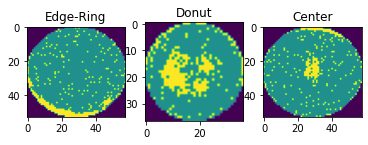

In [74]:
fig = plt.figure()

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

ax0.imshow(df[df['fType'] == 'Edge-Ring'].reset_index().loc[0]['waferMap'])
ax0.set_title('Edge-Ring')
ax1.imshow(df[df['fType'] == 'Donut'].reset_index().loc[0]['waferMap'])
ax1.set_title('Donut')
ax2.imshow(df[df['fType'] == 'Center'].reset_index().loc[0]['waferMap'])
ax2.set_title('Center')